In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [7]:
custom_palette = ["#526a8c",  
                  "#009b94", 
                  "#ef3e53",  
                  "#F9E79F",  
                  "#FAD7A0",  
                  "#D7BDE2"]  

sns.set_palette(custom_palette)
sns.set_style("white")

In [8]:
df = pd.read_csv("../Data/taxi_trip_pricing.csv", encoding="utf-8")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [10]:
print(f"Total de Valores nulos por Coluna \n{df.isnull().sum()} \n" )
print(f"Porcentagem de Valores nulos por Coluna \n{df.isnull().mean() * 100}\n" )

Total de Valores nulos por Coluna 
Trip_Distance_km         50
Time_of_Day              50
Day_of_Week              50
Passenger_Count          50
Traffic_Conditions       50
Weather                  50
Base_Fare                50
Per_Km_Rate              50
Per_Minute_Rate          50
Trip_Duration_Minutes    50
Trip_Price               49
dtype: int64 

Porcentagem de Valores nulos por Coluna 
Trip_Distance_km         5.0
Time_of_Day              5.0
Day_of_Week              5.0
Passenger_Count          5.0
Traffic_Conditions       5.0
Weather                  5.0
Base_Fare                5.0
Per_Km_Rate              5.0
Per_Minute_Rate          5.0
Trip_Duration_Minutes    5.0
Trip_Price               4.9
dtype: float64



In [11]:
df.shape

(1000, 11)

In [12]:
df.describe(include="all")

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
count,950.000000,950,950,950.000000,950,950,950.000000,950.000000,950.000000,950.000000,951.000000
unique,NaN,4,2,NaN,3,3,NaN,NaN,NaN,NaN,NaN
top,NaN,Afternoon,Weekday,NaN,Low,Clear,NaN,NaN,NaN,NaN,NaN
freq,NaN,371,655,NaN,397,667,NaN,NaN,NaN,NaN,NaN
mean,27.070547,NaN,NaN,2.476842,NaN,NaN,3.502989,1.233316,0.292916,62.118116,56.874773
std,19.905300,NaN,NaN,1.102249,NaN,NaN,0.870162,0.429816,0.115592,32.154406,40.469791
min,1.230000,NaN,NaN,1.000000,NaN,NaN,2.010000,0.500000,0.100000,5.010000,6.126900
25%,12.632500,NaN,NaN,1.250000,NaN,NaN,2.730000,0.860000,0.190000,35.882500,33.742650
50%,25.830000,NaN,NaN,2.000000,NaN,NaN,3.520000,1.220000,0.290000,61.860000,50.074500
75%,38.405000,NaN,NaN,3.000000,NaN,NaN,4.260000,1.610000,0.390000,89.055000,69.099350


# Trantando as Colunas:

## Colunas Numéricas:

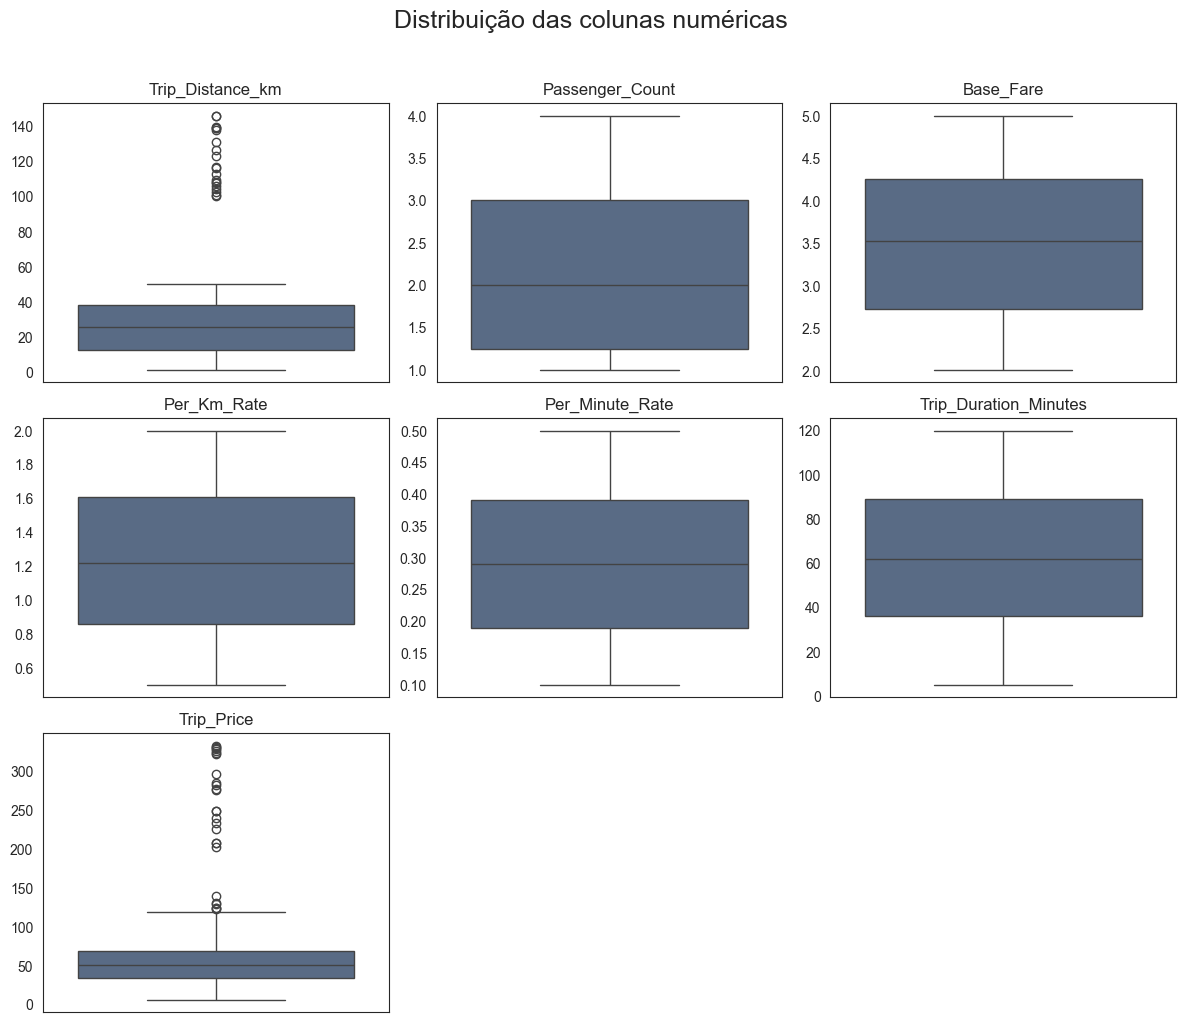

In [13]:
numericas = df.select_dtypes(include="number").columns

fig,ax = plt.subplots(3,3, figsize=(12,10))
ax = ax.flatten()

for i, col in enumerate(numericas):
    sns.boxplot(df, y=col, ax=ax[i])
    ax[i].set_title(col)
    ax[i].set_ylabel("")

for i in range(len(numericas), len(ax)):
    fig.delaxes(ax[i])

plt.suptitle('Distribuição das colunas numéricas', fontsize=18, y=1.02)
plt.tight_layout()

- Para Colunas com muitos Outliers faremos a mediana pois ela não é afetada por esses valores extremos, quando há muitos outliers a média pode ser puxada para cima ou para baixo, distorcendo a real representação dos dados;
- Para colunas com poucos ou sem nenhum outlier usaremos a média mesmo pois ela é uma medida eficiente e representa bem o comportamento real dos dados quando não se tem muitos outliers;

In [14]:
df_numericas = df[numericas]
medianas = df_numericas[["Trip_Distance_km", "Trip_Price"]]
medias = df_numericas.drop(["Trip_Distance_km", "Trip_Price"], axis=1)

In [15]:
for i, col in enumerate(medianas):
    df[col] = df[col].fillna(medianas[col].median())

for i, col in enumerate(medias):
    df[col] = df[col].fillna(medias[col].mean())

In [16]:
df.Passenger_Count = df.Passenger_Count.round()

## Colunas Categóricas:

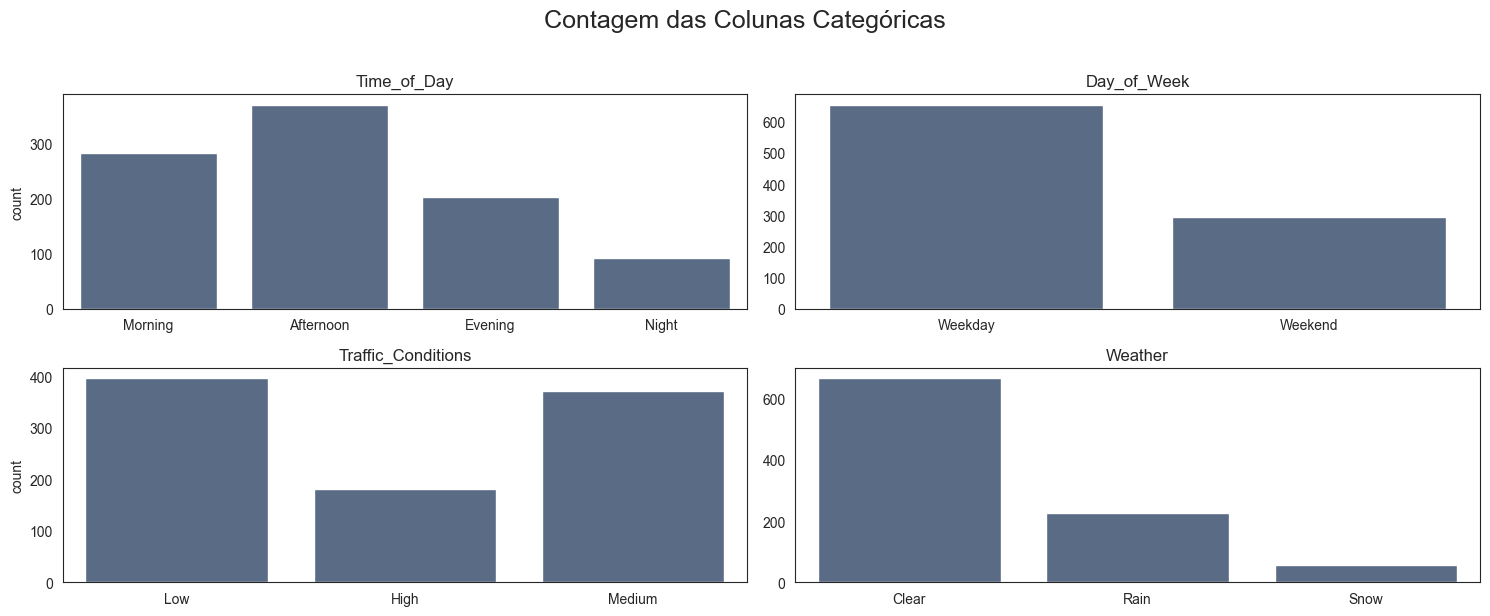

In [17]:
categoricas = df.select_dtypes(exclude="number").columns

fig,ax = plt.subplots(2,2,figsize=(15,6))
ax=ax.flatten()

for i, col in enumerate(categoricas):
    sns.countplot(df, x=col, ax=ax[i])
    ax[i].set_title(col)
    ax[i].set_xlabel("")
    
    if i%2 !=0:
        ax[i].set_ylabel("")

plt.suptitle("Contagem das Colunas Categóricas", fontsize=18, y=1.02)
plt.tight_layout()

- Para as variáveis Categóricas iremos substituir os valores nulos pelos valores com maior frequência, pois ele representa o valor mais comum dentro da distribuição de dados.

In [18]:
for col in categoricas:
    mode = df[col].mode()[0]
    df[col] = df[col].fillna(mode)

In [19]:
df.isnull().sum()

Trip_Distance_km         0
Time_of_Day              0
Day_of_Week              0
Passenger_Count          0
Traffic_Conditions       0
Weather                  0
Base_Fare                0
Per_Km_Rate              0
Per_Minute_Rate          0
Trip_Duration_Minutes    0
Trip_Price               0
dtype: int64

# Análise Exploratória
- Com foco em entender oq causa o preço

## Distância da Corrida e o Preço:

In [20]:
df_grupos = df.copy(deep=True)
df_grupos["Grupos_Distancia"] = pd.cut(df_grupos["Trip_Distance_km"], bins=10)
media_grupo = df_grupos.groupby("Grupos_Distancia")["Trip_Price"].mean().reset_index()
media_grupo["Distancia_Media"] = media_grupo["Grupos_Distancia"].apply(lambda x: x.mid)

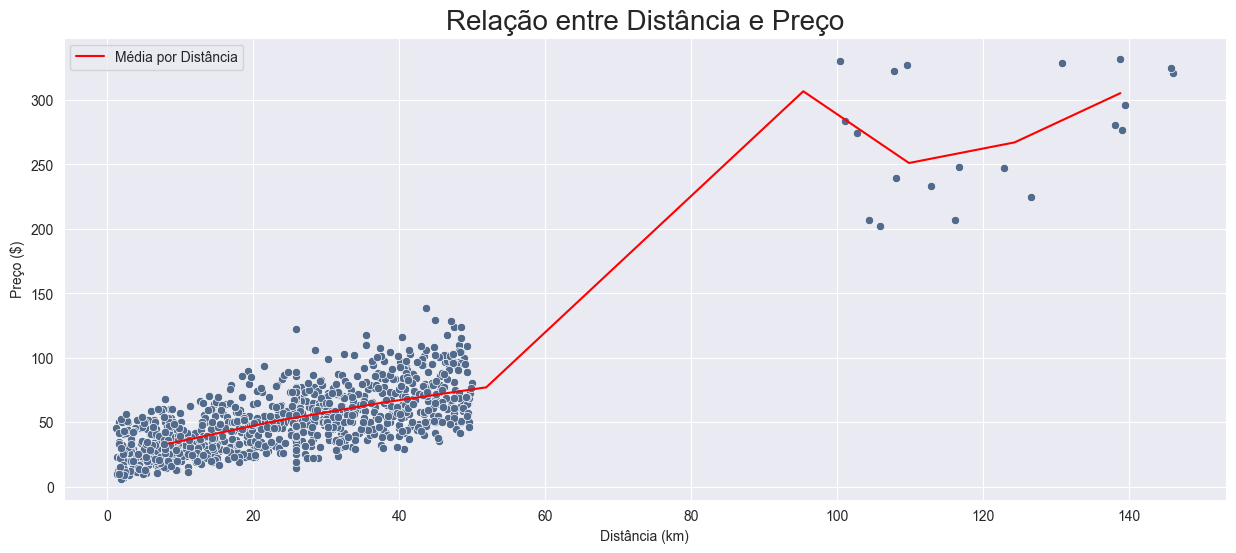

In [21]:
sns.set_style("darkgrid")
plt.figure(figsize=(15,6))

sns.lineplot(media_grupo, x="Distancia_Media", y="Trip_Price", color='red', label='Média por Distância')
sns.scatterplot(df, x="Trip_Distance_km", y="Trip_Price")

plt.title("Relação entre Distância e Preço", fontsize=20)
plt.xlabel("Distância (km)")
plt.ylabel("Preço ($)")
plt.legend()
plt.show()

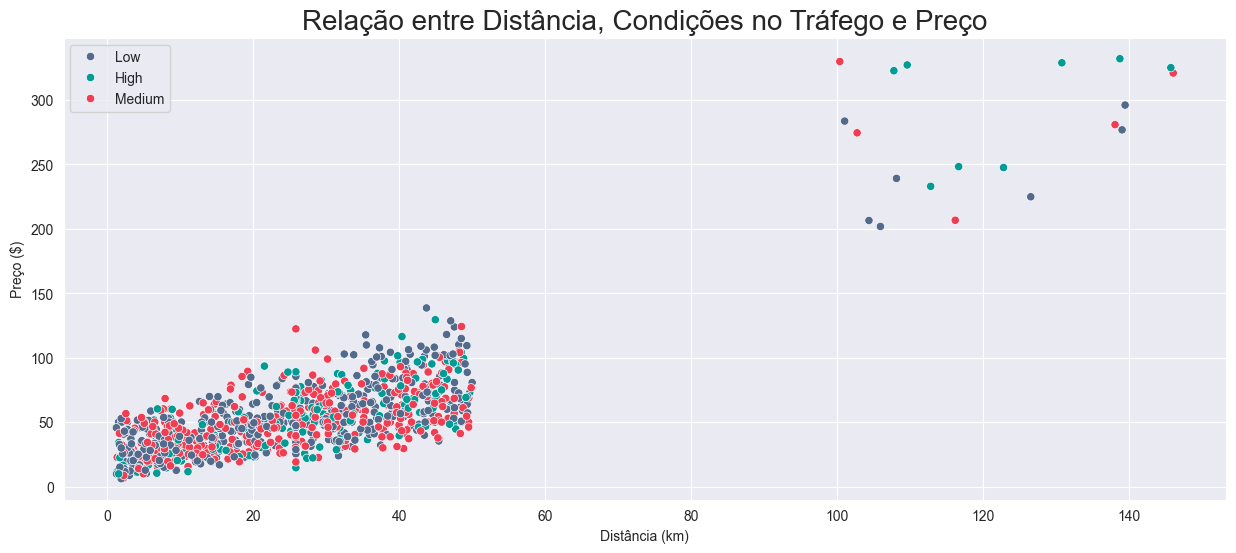

In [22]:
plt.figure(figsize=(15,6))

sns.scatterplot(df, x="Trip_Distance_km", y="Trip_Price", hue="Traffic_Conditions")

plt.title("Relação entre Distância, Condições no Tráfego e Preço", fontsize=20)
plt.xlabel("Distância (km)")
plt.ylabel("Preço ($)")
plt.legend()
plt.show()

In [23]:
df.loc[df.Trip_Distance_km >= 100]

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
22,105.943550,Night,Weekend,2.0,Low,Rain,3.94,1.690000,0.320000,23.03,201.869509
27,138.098328,Evening,Weekend,4.0,Medium,Rain,2.24,1.750000,0.320000,94.86,280.877302
64,146.067047,Afternoon,Weekday,2.0,Medium,Clear,4.79,0.730000,0.300000,60.81,320.958664
108,112.830958,Afternoon,Weekday,2.0,High,Snow,3.35,1.900000,0.230000,78.63,233.008285
110,102.747556,Evening,Weekday,2.0,Medium,Clear,2.23,1.800000,0.230000,53.09,274.535087
141,109.616082,Afternoon,Weekday,4.0,High,Clear,4.46,1.690000,0.230000,53.88,327.217665
225,130.809001,Afternoon,Weekday,1.0,High,Clear,3.93,0.630000,0.160000,88.31,328.871769
267,116.196064,Afternoon,Weekend,4.0,Medium,Clear,2.20,0.850000,0.250000,19.63,206.699570
268,139.062230,Afternoon,Weekday,2.0,Low,Rain,2.80,1.820000,0.140000,50.83,276.840597
287,100.380420,Afternoon,Weekday,3.0,Medium,Rain,4.46,1.233316,0.292916,89.21,329.913004


## Hora do dia e Preço

In [24]:
total_horario = df.groupby(["Time_of_Day"])["Trip_Price"].count().reset_index()
media_horario = df.groupby(["Time_of_Day"])["Trip_Price"].mean().reset_index()

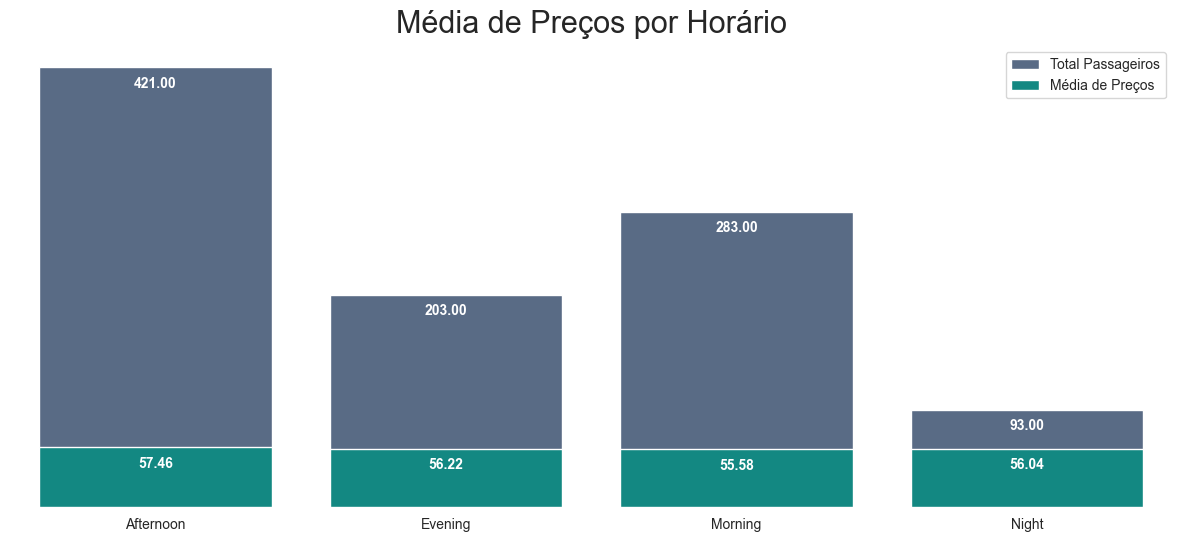

In [25]:
sns.set_style("whitegrid")

plt.figure(figsize=(15, 6))

ax = sns.barplot(total_horario, x="Time_of_Day", y="Trip_Price", label="Total Passageiros")
ax = sns.barplot(media_horario, x="Time_of_Day", y="Trip_Price", label="Média de Preços")

plt.title("Média de Preços por Horário", fontsize=22, y=1.01)
ax.set_frame_on(False)
ax.grid(False)
plt.xlabel("")
plt.yticks([])
plt.ylabel("")

for container in ax.containers:
    labels = [f"{valor.get_height():.2f}" for valor in container]
    heights = [valor.get_height() - 15 for valor in container]
    
    for bar, label, height in zip(container, labels, heights):
        ax.text(bar.get_x() + bar.get_width() /2, height, label, ha="center", va="center", fontsize=10, color="white", fontweight="bold")

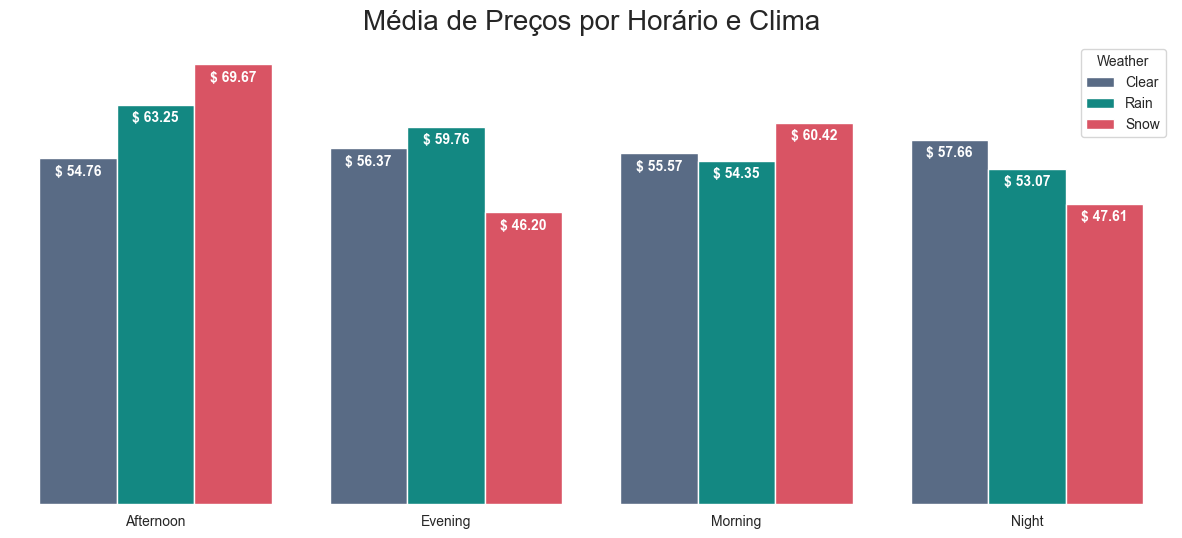

In [26]:
media_horario2 = df.groupby(["Time_of_Day", "Weather"])["Trip_Price"].mean().reset_index()
sns.set_style("whitegrid")

plt.figure(figsize=(15, 6))
ax = sns.barplot(media_horario2, x="Time_of_Day", y="Trip_Price", hue="Weather")
plt.title("Média de Preços por Horário e Clima", fontsize=20, y=1.01)
ax.set_frame_on(False)
ax.grid(False)
plt.xlabel("")
plt.yticks([])
plt.ylabel("")

for container in ax.containers:
    labels = [f"$ {valor.get_height():.2f}" for valor in container]
    heights = [valor.get_height() - 2 for valor in container]
    
    for bar, label, height in zip(container, labels, heights):
        ax.text(bar.get_x() + bar.get_width() /2, height, label, ha="center", va="center", fontsize=10, color="white", fontweight="bold")

## Dia da Semana e o Preço:

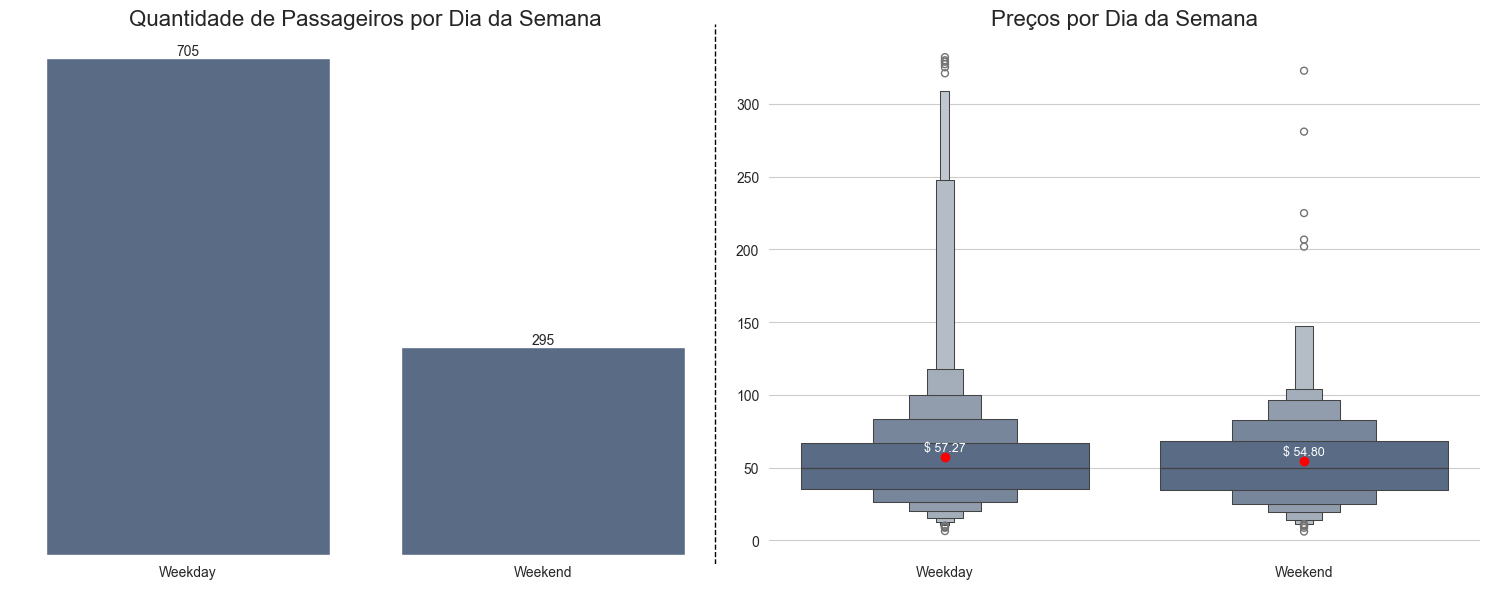

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

sns.countplot(df, x="Day_of_Week", ax=ax[0])
ax[0].set_title('Quantidade de Passageiros por Dia da Semana', fontsize=16)
ax[0].set_ylabel("")
ax[0].set_xlabel("")
ax[0].set_frame_on(False)
ax[0].set_yticks([])
for container in ax[0].containers:
    heights = [valor.get_height() for valor in container]
    labels = [f"{valor:.0f}" for valor in heights]
    for bar, label, height in zip(container, labels, heights):
        ax[0].text(bar.get_x() + bar.get_width() / 2, height, label, 
                   ha='center', va='bottom', fontsize=10)


sns.boxenplot(df, x="Day_of_Week", y="Trip_Price", ax=ax[1])
ax[1].set_title("Preços por Dia da Semana", fontsize=16)
ax[1].set_ylabel("")
ax[1].set_xlabel("")
ax[1].set_frame_on(False)

media_por_dia = df.groupby("Day_of_Week")["Trip_Price"].mean()
for i, (dia, media) in enumerate(media_por_dia.items()):
    ax[1].scatter(i, media, color='red') 
    ax[1].text(i, media + 2, f"$ {media:.2f}", ha='center', va='bottom', color='white', fontsize=9)

fig.subplots_adjust(wspace=0.5)
line_x = 0.48  
fig_line = fig.add_axes([line_x - 0.001, 0.05, 0.002, 0.9])  
fig_line.axis("off")
fig_line.plot([0.5, 0.5], [0, 1], transform=fig_line.transAxes,
              linestyle="--", color="black", linewidth=1)

plt.tight_layout()
plt.show()

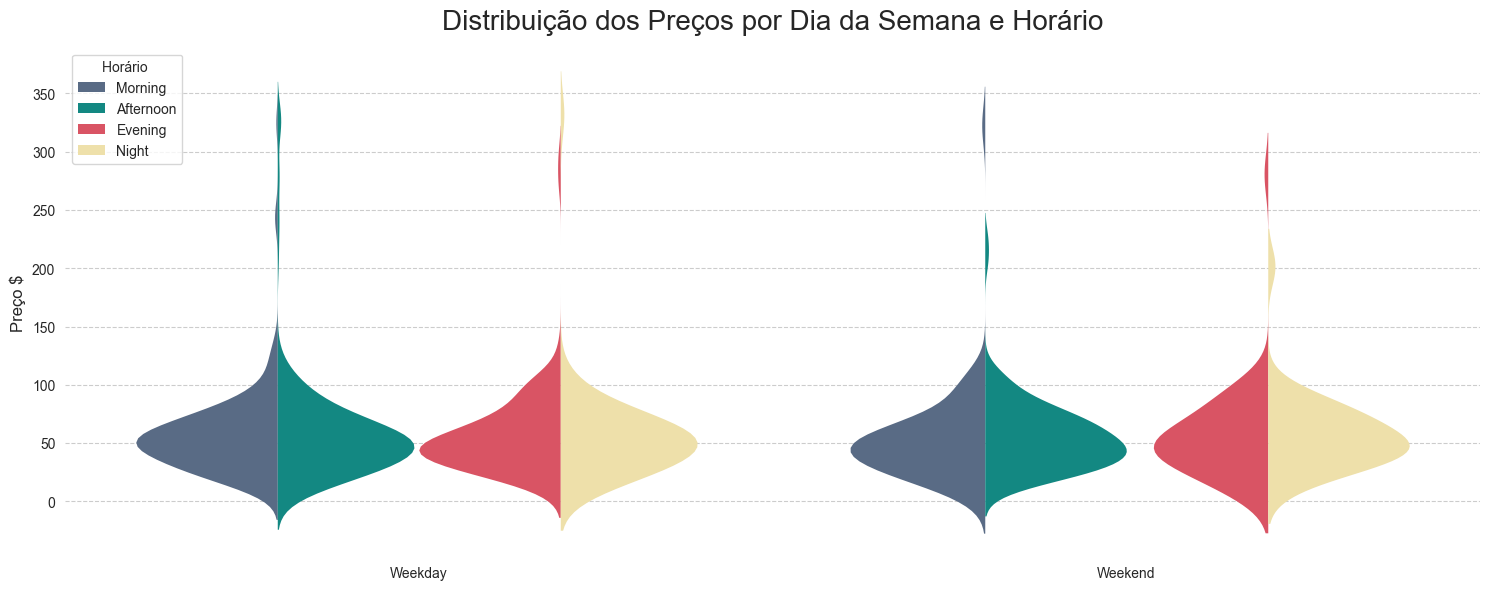

In [28]:
plt.figure(figsize=(15, 6))
sns.set_style("whitegrid")

ax = sns.violinplot( data=df, x="Day_of_Week", y="Trip_Price", hue="Time_of_Day", split=True, linewidth=0)
plt.title("Distribuição dos Preços por Dia da Semana e Horário", fontsize=20, y=1.02)
plt.xlabel("")
plt.ylabel("Preço $", fontsize=12)
plt.legend(title="Horário ", loc="upper left")
ax.set_frame_on(False)
plt.grid(axis="y", linestyle='--')
plt.tight_layout()
plt.show()

## Nº de Passageiros e o Preço:

In [29]:
qtd_passageiros = df.groupby("Passenger_Count")["Trip_Price"].count().reset_index()
media_passageiros = df.groupby("Passenger_Count")["Trip_Price"].mean().reset_index()

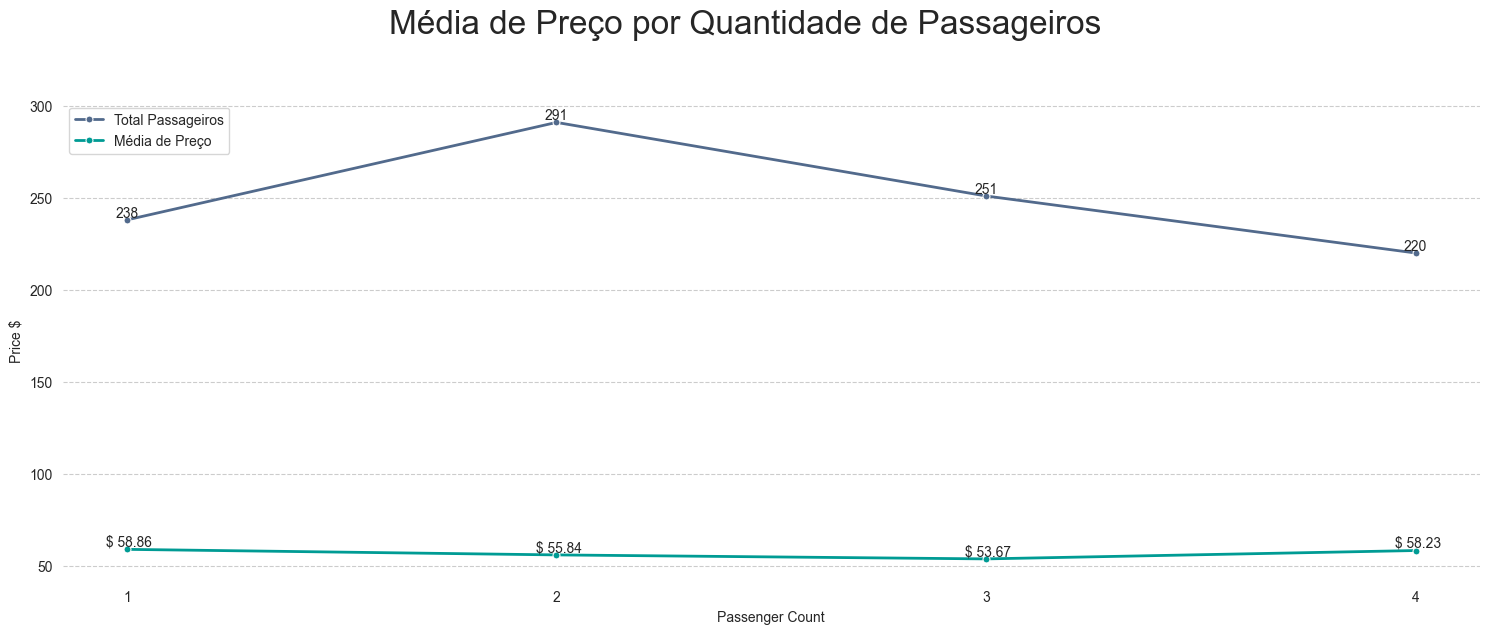

In [30]:
plt.figure(figsize=(15,6))

ax = sns.lineplot(qtd_passageiros, x="Passenger_Count", y="Trip_Price", errorbar=None, marker="o", markersize=5, lw=2, label="Total Passageiros")
ax.set_frame_on(False)
ax.grid(False)
ax.grid(axis="y", linestyle="--")
ax.set_ylabel("Price $")
ax.set_xlabel("Passenger Count")
ax.set_xticks(range(1,5,1))

for i, valor in enumerate(qtd_passageiros["Trip_Price"]):
    ax.text(i + 1, valor + 0.1, f"{valor:.0f}", ha="center", va="bottom")


ax1 = sns.lineplot(media_passageiros, x="Passenger_Count", y="Trip_Price", errorbar=None, marker="o", markersize=5, lw=2, label="Média de Preço")
ax1.set_frame_on(False)
ax1.grid(False)
ax1.grid(axis="y", linestyle="--")
ax1.set_ylabel("Price $")
ax1.set_xlabel("Passenger Count")
ax1.set_xticks(range(1,5,1))

plt.suptitle("Média de Preço por Quantidade de Passageiros", fontsize=24, y=1.05)

for i, valor in enumerate(media_passageiros["Trip_Price"]):
    ax1.text(i + 1, valor + 0.3, f" $ {valor:.2f}", ha="center", va="bottom")

plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

## Condições no Tráfego e o Preço:

In [31]:
total_condicoes = df.groupby("Traffic_Conditions")["Trip_Price"].count().reset_index()
media_condicoes = df.groupby("Traffic_Conditions")["Trip_Price"].mean().reset_index()

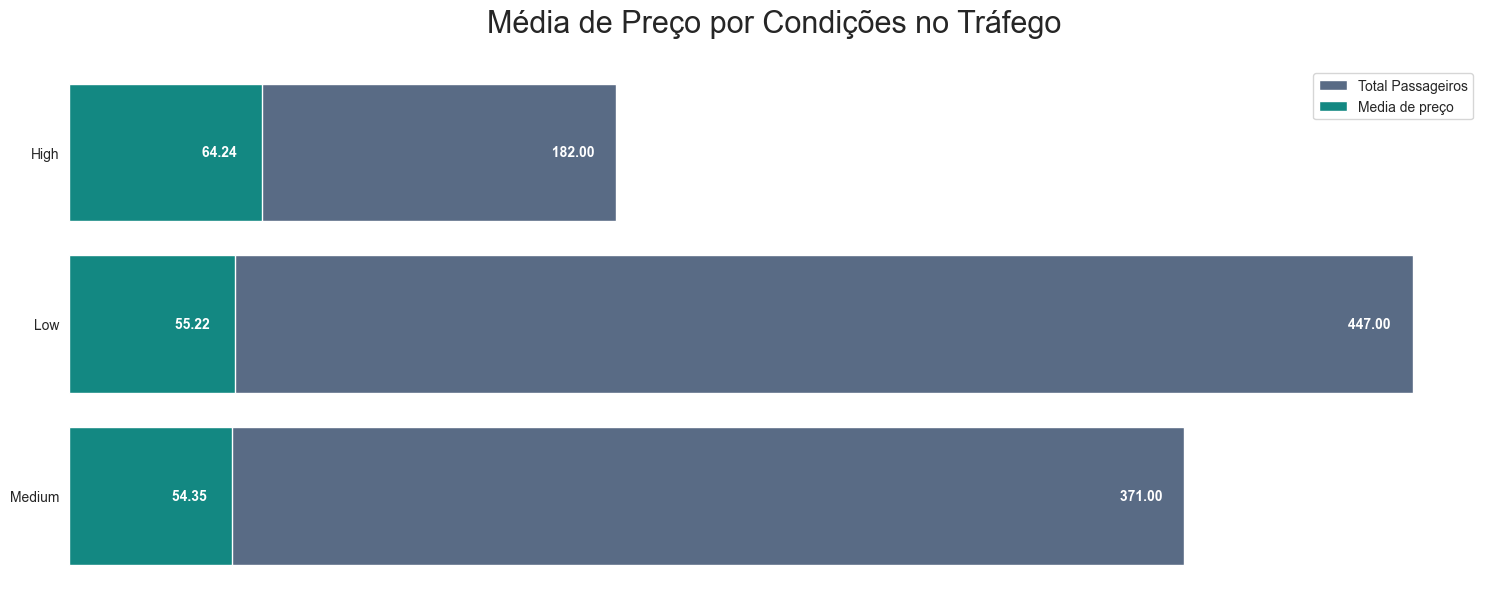

In [32]:
plt.figure(figsize=(15,6))

ax = sns.barplot(total_condicoes, y="Traffic_Conditions", x="Trip_Price", errorbar=None, label="Total Passageiros")
ax = sns.barplot(media_condicoes, y="Traffic_Conditions", x="Trip_Price", errorbar=None, label="Media de preço")

plt.title("Média de Preço por Condições no Tráfego", fontsize=22, y=1.05)
ax.set_frame_on(False)
ax.grid(False)
plt.xlabel("")
plt.xticks([])
plt.ylabel("")

for container in ax.containers:
    labels = [f" {valor.get_width():.2f}" for valor in container]
    heights = [valor.get_width() - 15 for valor in container]
    
    for bar, label, height in zip(container, labels, heights):
        ax.text(height, bar.get_y() + bar.get_height() /2, label, ha="center", va="center", fontsize=10, color="white", fontweight="bold")

plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

In [33]:
media_condicoes2 = df.groupby(["Traffic_Conditions", "Day_of_Week"])["Trip_Price"].mean().reset_index()

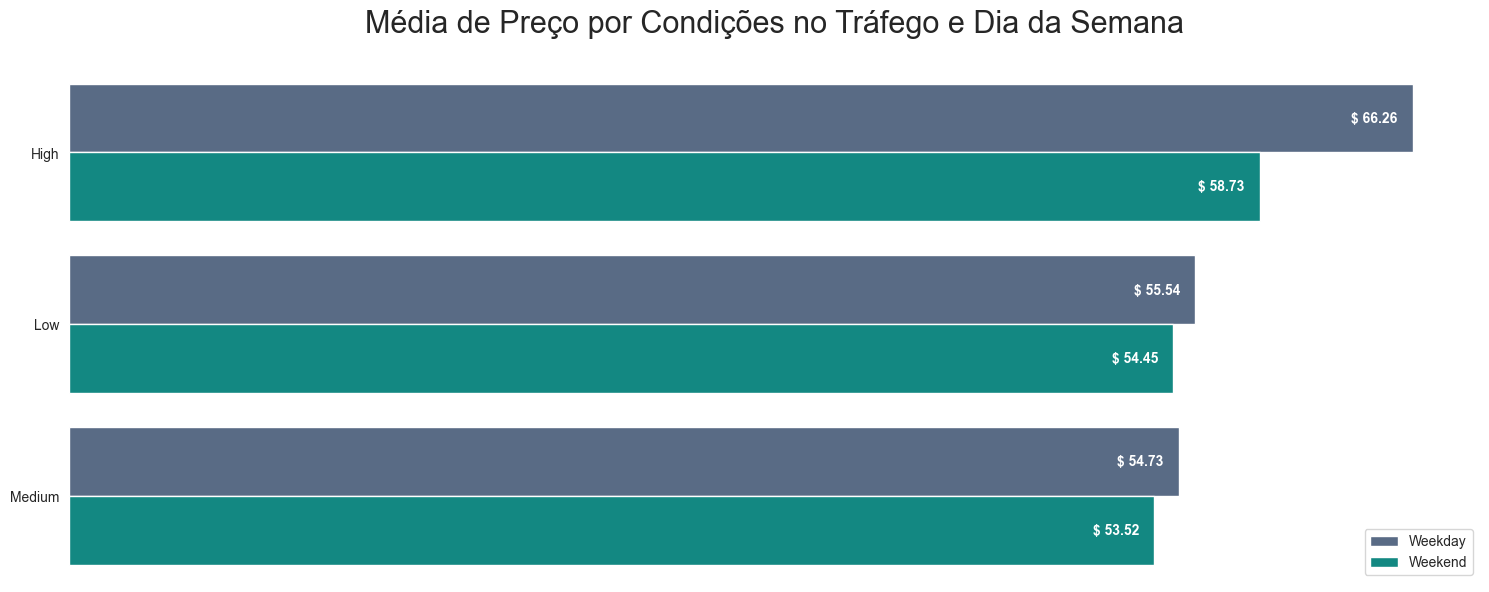

In [34]:
plt.figure(figsize=(15,6))

ax = sns.barplot(media_condicoes2, y="Traffic_Conditions", x="Trip_Price", errorbar=None, hue="Day_of_Week")

plt.title("Média de Preço por Condições no Tráfego e Dia da Semana", fontsize=22, y=1.05)
ax.set_frame_on(False)
ax.grid(False)
plt.xlabel("")
plt.xticks([])
plt.ylabel("")

for container in ax.containers:
    labels = [f" $ {valor.get_width():.2f}" for valor in container]
    heights = [valor.get_width() -2 for valor in container]
    for bar, label, height in zip(container, labels, heights):
        ax.text(height, bar.get_y() + bar.get_height() /2, label, ha="center", va="center", fontsize=10, color="white", fontweight="bold")

plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

Condições + dia
clima + distancia

In [35]:
media_clima = df.groupby("Weather")["Trip_Price"].mean()

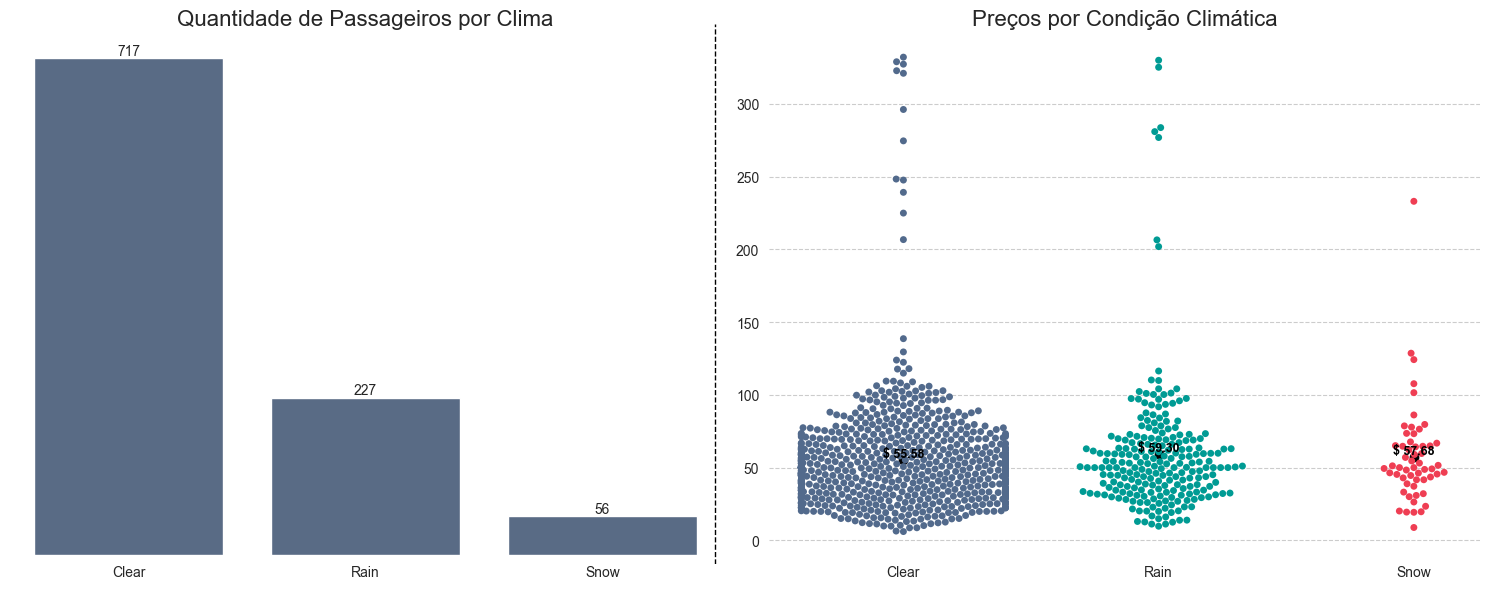

In [36]:
fig, ax = plt.subplots(1, 2, figsize=(15,6))

sns.countplot(df, x="Weather", ax=ax[0])
ax[0].set_title("Quantidade de Passageiros por Clima", fontsize=16)
ax[0].set_frame_on(False)
ax[0].set_xlabel("")
ax[0].set_ylabel("")
ax[0].set_yticks([])
for container in ax[0].containers:
    labels = [f"{valor.get_height():.0f}" for valor in container]
    heights = [valor.get_height() + 1 for valor in container]
    for bar, label, height in zip(container, labels, heights):
        ax[0].text(bar.get_x() + bar.get_width() /2, height, label, ha="center", va="bottom")
    
    
sns.swarmplot(data=df, x="Weather", y="Trip_Price", ax=ax[1], palette=custom_palette)
ax[1].set_title("Preços por Condição Climática", fontsize=16)
ax[1].set_xlabel("")
ax[1].set_ylabel("Preço ($)")
ax[1].set_frame_on(False)
ax[1].grid(axis="y", linestyle="--")
ax[1].set_ylabel("")
for i, (clima, media) in enumerate(media_clima.items()):
    ax[1].scatter(i, media, color="black")
    ax[1].text(i, media, f"$ {media:.2f}", ha="center", va="bottom", color="black", fontsize=9, fontweight="bold")


fig.subplots_adjust(wspace=0.5)
line_x = 0.48  
fig_line = fig.add_axes([line_x - 0.001, 0.05, 0.002, 0.9])  
fig_line.axis("off")
fig_line.plot([0.5, 0.5], [0, 1], transform=fig_line.transAxes,
              linestyle="--", color="black", linewidth=1)

plt.tight_layout()
plt.show()

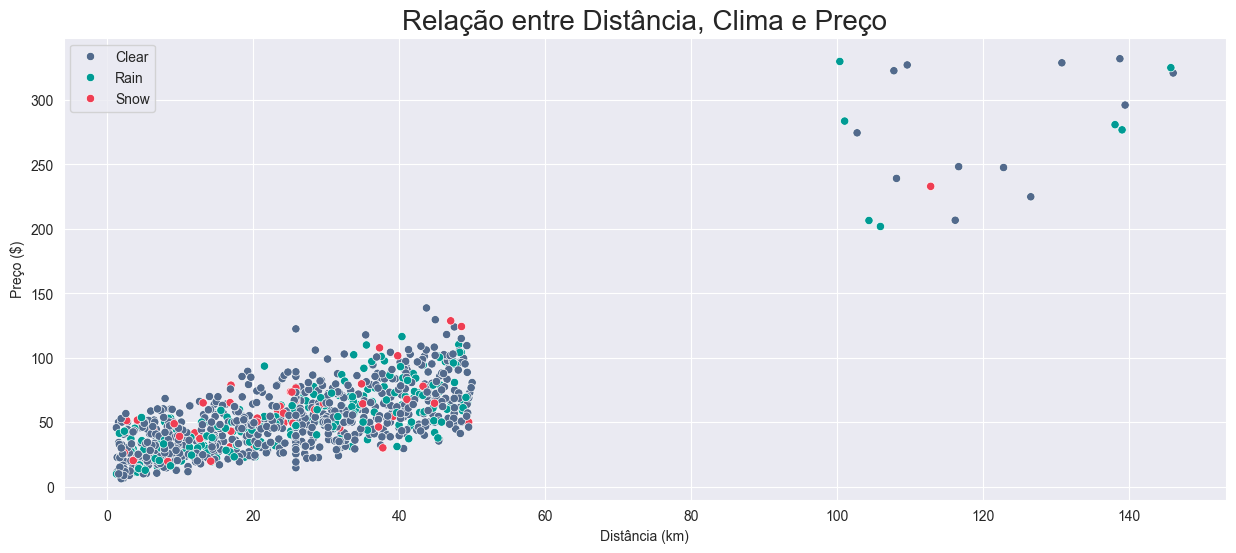

In [37]:
sns.set_style("darkgrid")
plt.figure(figsize=(15,6))

sns.scatterplot(df, x="Trip_Distance_km", y="Trip_Price", hue="Weather")

plt.title("Relação entre Distância, Clima e Preço", fontsize=20)
plt.xlabel("Distância (km)")
plt.ylabel("Preço ($)")
plt.legend()
plt.show()

## Relação entre todas as variáveis e o Preço:

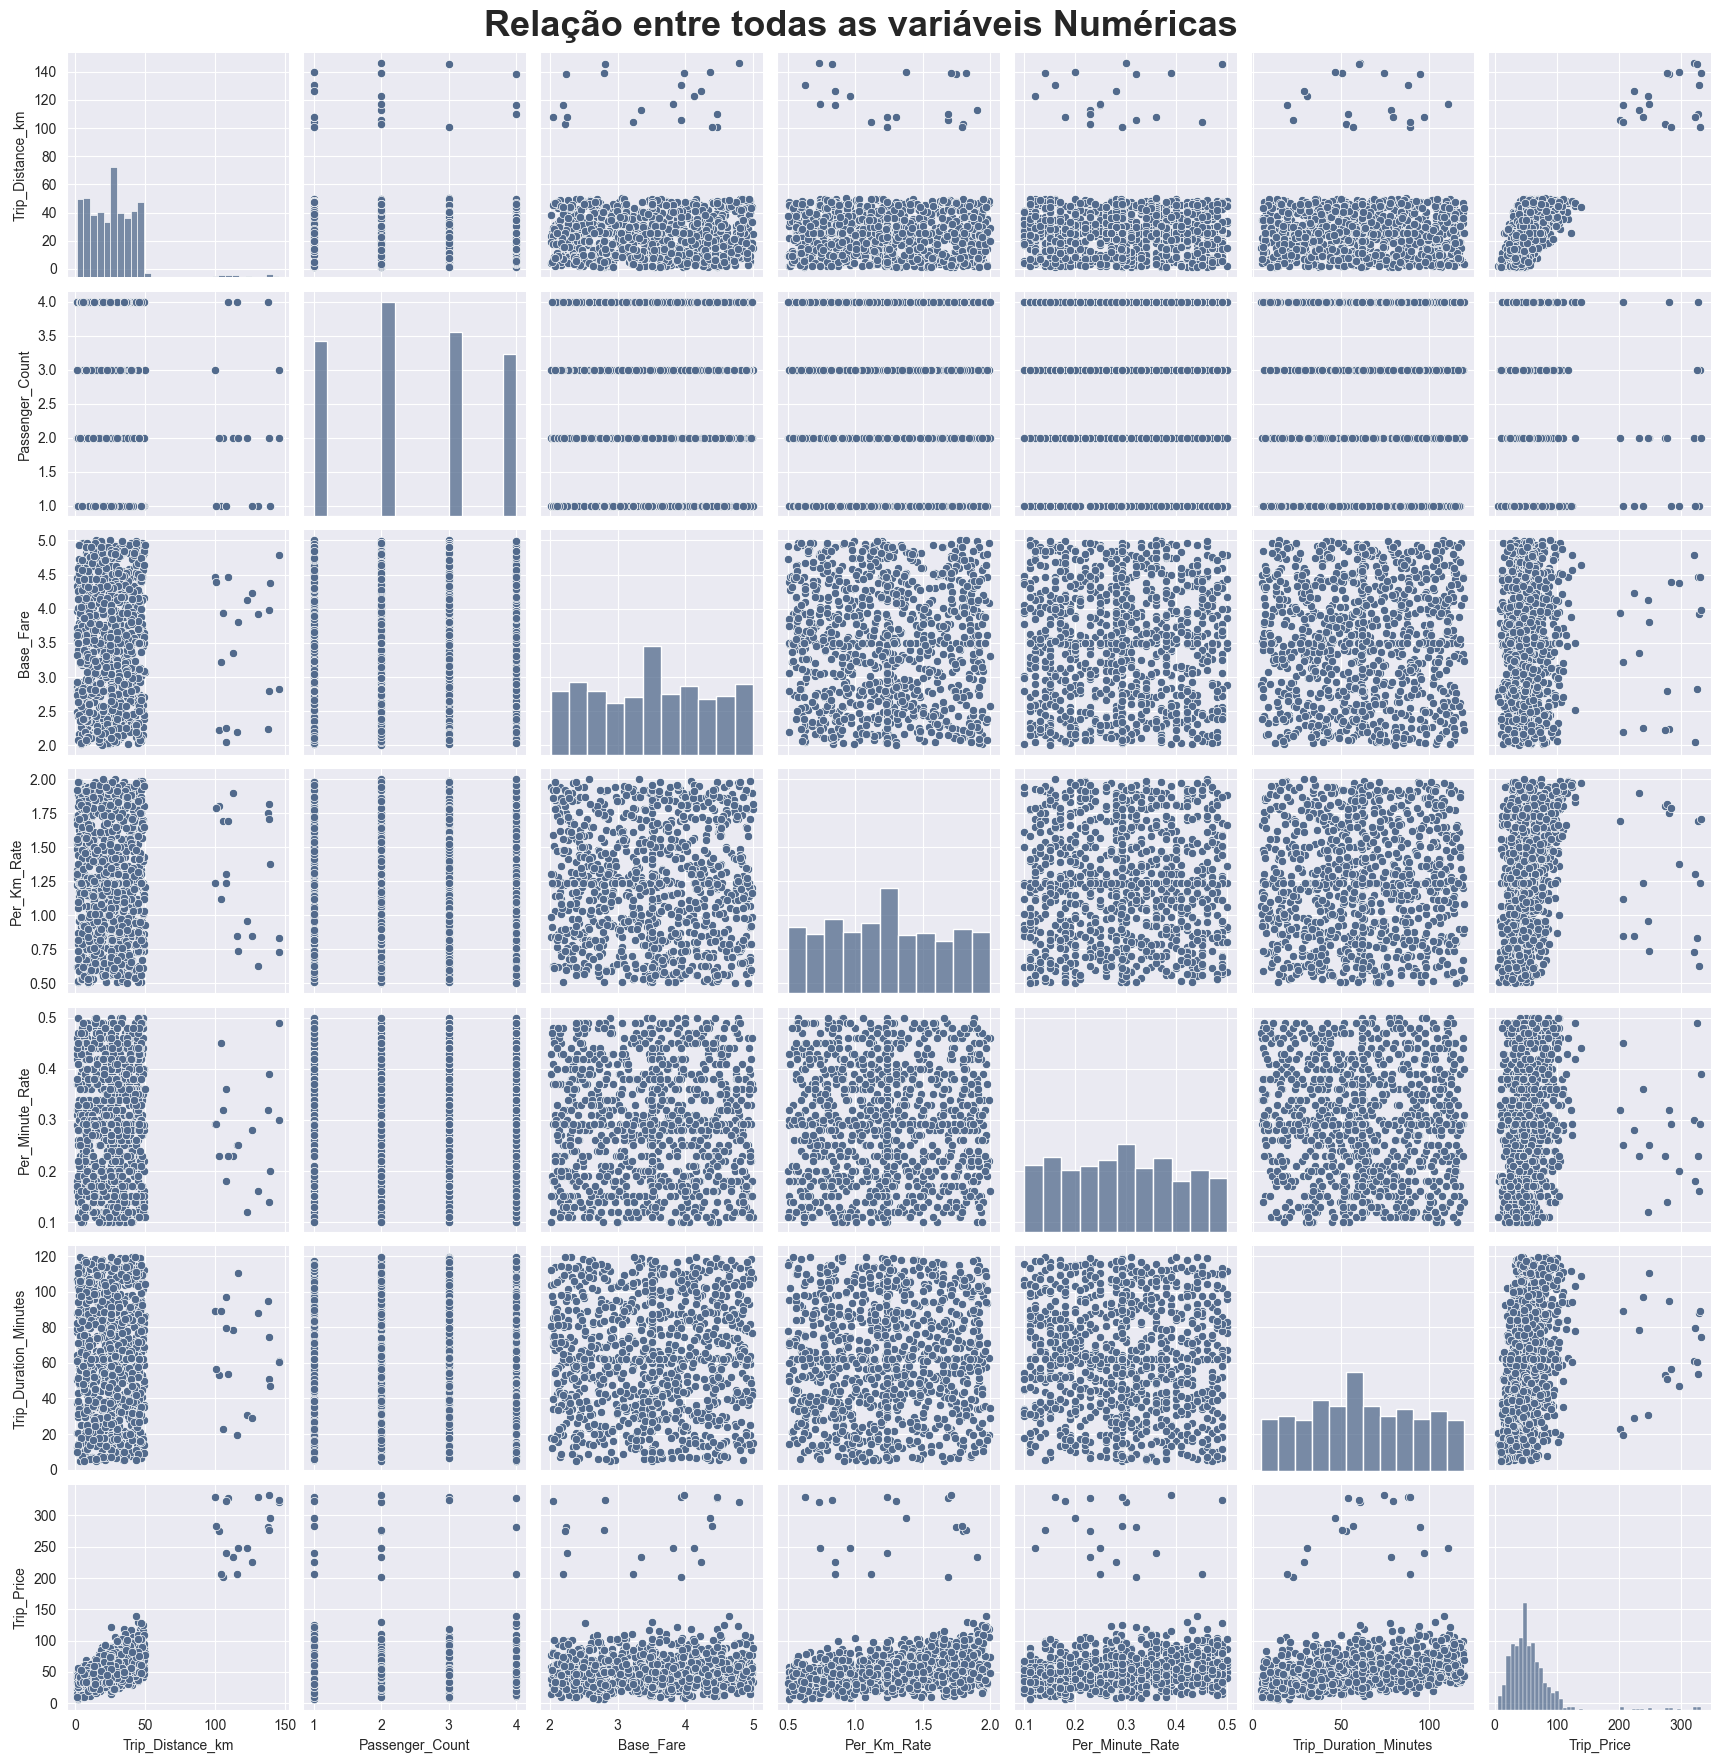

In [38]:
pairplot = sns.pairplot(df, palette=custom_palette)
pairplot.fig.suptitle("Relação entre todas as variáveis Numéricas", y=1.01,
                      fontsize=26, fontweight="bold")
plt.show()

# Feature Enginer

## Transformando as variáveis Categóricas em Numéricas

In [39]:
from sklearn.preprocessing import LabelEncoder

In [40]:
df_model = df.copy(deep=True)
le = LabelEncoder()

for i in categoricas:
    df_model[i] = le.fit_transform(df_model[i])

df_model.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,2,0,3.0,1,0,3.560000,0.80,0.32,53.82,36.2624
1,47.59,0,0,1.0,0,0,3.502989,0.62,0.43,40.57,50.0745
2,36.87,1,1,1.0,0,0,2.700000,1.21,0.15,37.27,52.9032
3,30.33,1,0,4.0,1,0,3.480000,0.51,0.15,116.81,36.4698
4,25.83,1,0,3.0,0,0,2.930000,0.63,0.32,22.64,15.6180


## Verificando Correlações:

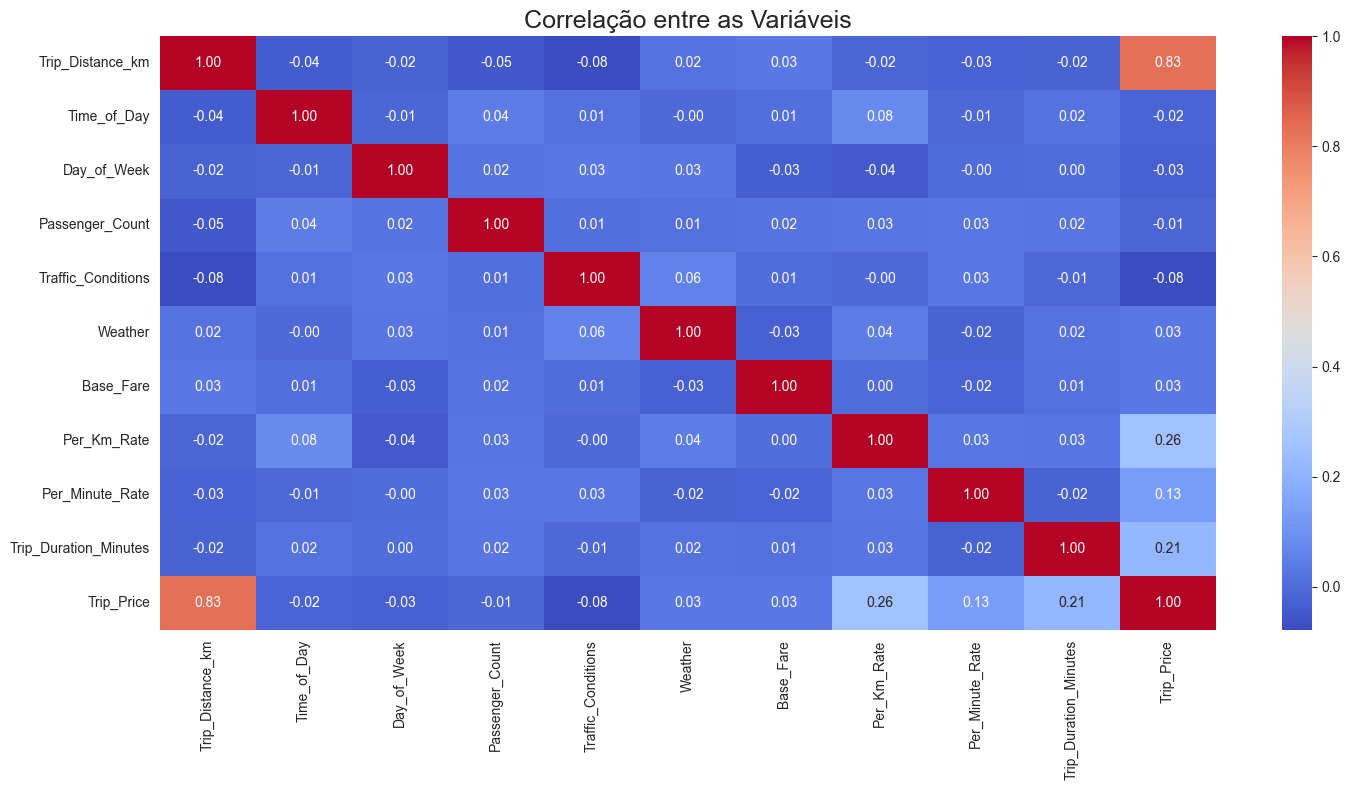

In [41]:
plt.figure(figsize=(15,8))

corr = df_model.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlação entre as Variáveis', fontsize=18)

plt.tight_layout()
plt.show()

## Importância das Variáveis:

In [42]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split

In [43]:
df_feat = df_model.copy(deep=True)
x = df_feat.drop(columns=["Trip_Price"])
y= df_feat["Trip_Price"]

X_ftrain, X_ftest, y_ftrain, y_ftest = train_test_split(x,y, test_size=0.3, random_state=42)

In [44]:
mi_score = mutual_info_regression(X_ftrain, y_ftrain)

In [45]:
df_mi = pd.DataFrame({"Features": X_ftrain.columns, "Mi_Score": mi_score}).sort_values(by="Mi_Score", ascending=False)

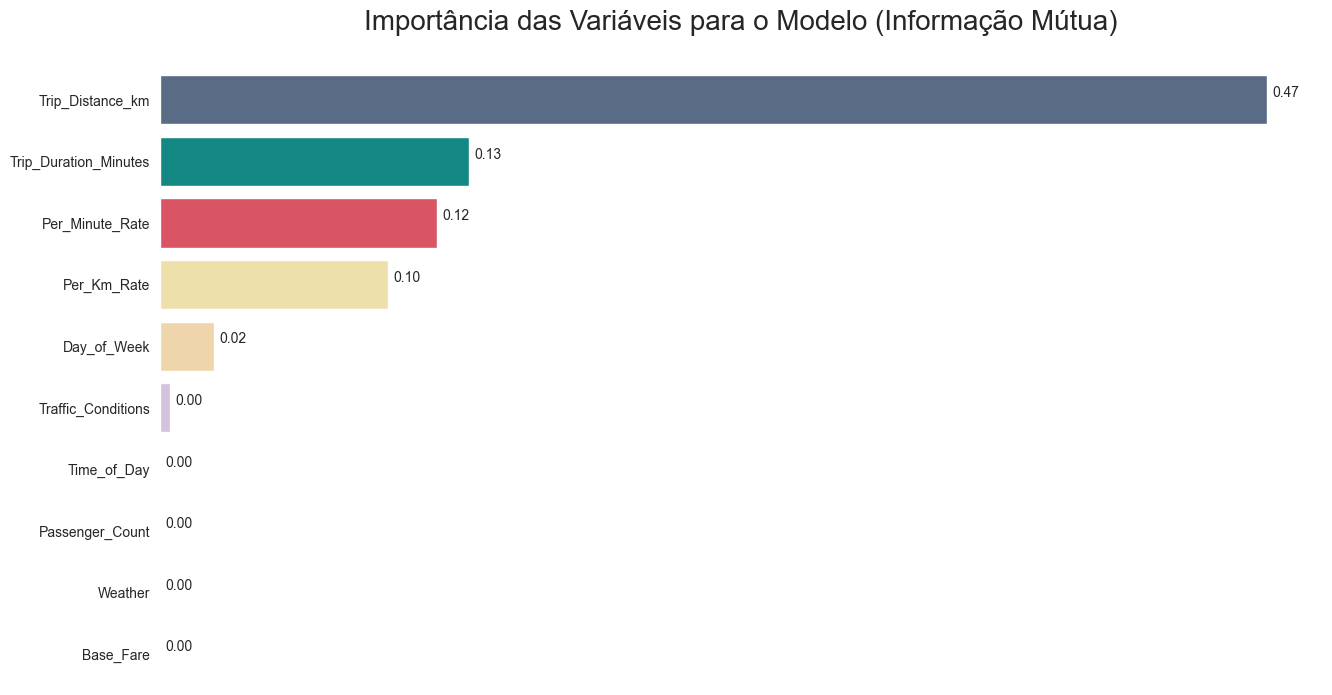

In [46]:
sns.set_style("white")
plt.figure(figsize=(15,8))

ax = sns.barplot(df_mi, y="Features", x="Mi_Score", palette=custom_palette)
plt.title("Importância das Variáveis para o Modelo (Informação Mútua)", fontsize=20, y=1.05)
ax.set_frame_on(False)
ax.set_xlabel("")
ax.set_xticks([])
ax.set_ylabel("")

for container in ax.containers:
    labels = [f"{valor.get_width():.2f}" for valor in container]
    heights = [valor.get_width() + 0.008 for valor in container]
    for bar, label, height in zip(container, labels, heights):
        ax.text(height, bar.get_y() + bar.get_height()/2,  label, ha="center", va="bottom")
plt.show()

## Separando em Treino e Teste
- e excluindo as variáveis com importância = 0

In [47]:
x = df_model.drop(columns=["Base_Fare", "Weather", "Passenger_Count", "Trip_Price"])
y=df["Trip_Price"]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

Normalizando o Dataset
- A padronização (scaling) melhora o desempenho de modelos sensíveis à magnitude dos dados. É essencial aplicar o escalonamento tanto nos dados de treino quanto nos de teste, sem vazamento de informações, para simular o uso real do modelo com dados novos e nunca vistos.

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelos de Regressão

In [50]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [51]:
from sklearn.model_selection import KFold, cross_val_score

In [52]:
kfold = KFold(n_splits=15, shuffle=True, random_state=5)

## Regressão Linear Múltipla

In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
reg_multi = LinearRegression(fit_intercept=True).fit(X_train, y_train)

In [55]:
y_pred_multi = reg_multi.predict(X_test)

In [56]:
cross_multi = cross_val_score(reg_multi, x, y, cv=kfold)

In [57]:
metrics = {
    "Score_Treino": reg_multi.score(X_train, y_train),
    "Score_Teste": reg_multi.score(X_test, y_test),
    "ABS": abs(y_test - y_pred_multi).mean(),
    "MAE": mean_absolute_error(y_test, y_pred_multi),
    "MSE": mean_squared_error(y_test, y_pred_multi),
    "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_multi)),
    "Cross_Val": cross_multi.mean()
}

df_multi = pd.DataFrame(metrics, index=["Regressão Múltipla"])

## Suport Verctor Machine

In [58]:
from sklearn.svm import SVR

In [59]:
reg_svr = SVR(kernel="linear").fit(X_train, y_train)

In [60]:
y_pred_svr = reg_svr.predict(X_test)

In [61]:
cross_svr = cross_val_score(reg_svr, x, y, cv=kfold)

In [62]:
metrics = {
    "Score_Treino": reg_svr.score(X_train, y_train),
    "Score_Teste": reg_svr.score(X_test, y_test),
    "ABS": abs(y_test - y_pred_svr).mean(),
    "MAE": mean_absolute_error(y_test, y_pred_svr),
    "MSE": mean_squared_error(y_test, y_pred_svr),
    "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_svr)),
    "Cross_Val": cross_svr.mean()
}
df_svr = pd.DataFrame(metrics, index=['SVR'])

## Árvore de Decisão

In [63]:
from sklearn.tree import DecisionTreeRegressor

In [64]:
reg_tree = DecisionTreeRegressor(max_depth=5).fit(X_train, y_train)

In [65]:
y_pred_tree = reg_tree.predict(X_test)

In [66]:
cross_tree = cross_val_score(reg_tree, x, y, cv=kfold)

In [67]:
metrics = {
    "Score_Treino": reg_tree.score(X_train, y_train),
    "Score_Teste": reg_tree.score(X_test, y_test),
    "ABS": abs(y_test - y_pred_tree).mean(),
    "MAE": mean_absolute_error(y_test, y_pred_tree),
    "MSE": mean_squared_error(y_test, y_pred_tree),
    "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_tree)),
    "Cross_Val": cross_tree.mean()
}
df_tree = pd.DataFrame(metrics, index=["Decision_Tree"])

## Random Forest

In [68]:
from sklearn.ensemble import RandomForestRegressor

In [69]:
reg_forest = RandomForestRegressor(n_estimators=70, criterion="squared_error", max_depth=6).fit(X_train, y_train)

In [70]:
y_pred_forest = reg_forest.predict(X_test)

In [71]:
cross_test = cross_val_score(reg_forest, x, y, cv=kfold)

In [72]:
metrics = {
    "Score_Treino": reg_forest.score(X_train, y_train),
    "Score_Teste": reg_forest.score(X_test, y_test),
    "ABS": abs(y_test - y_pred_forest).mean(),
    "MAE": mean_absolute_error(y_test, y_pred_forest),
    "MSE": mean_squared_error(y_test, y_pred_forest),
    "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_forest)),
    "Cross_Val": cross_test.mean()
}
df_forest = pd.DataFrame(metrics, index=["Random_Forest"])

## XGBOOST

In [73]:
from xgboost import XGBRegressor

In [74]:
reg_xgb = XGBRegressor(n_estimators=100, max_depth=3, learning_rate=0.05, subsample=0.5, colsample_bytree=0.9, gamma=5,
                       reg_alpha=1, reg_lambda=1, objective="reg:squarederror", random_state=42).fit(X_train, y_train)

In [75]:
y_pred_xgb = reg_xgb.predict(X_test)

In [76]:
cross_xgb = cross_val_score(reg_xgb, x, y, cv=kfold)

In [77]:
metrics = {
    "Score_Treino": reg_xgb.score(X_train, y_train),
    "Score_Teste": reg_xgb.score(X_test, y_test),
    "ABS": abs(y_test - y_pred_xgb).mean(),
    "MAE": mean_absolute_error(y_test, y_pred_xgb),
    "MSE": mean_squared_error(y_test, y_pred_xgb),
    "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_xgb)),
    "Cross_Val": cross_xgb.mean()
}
df_xgb = pd.DataFrame(metrics, index=["XGBOOST"])

## Catboost

In [78]:
from catboost import CatBoostRegressor

In [79]:
reg_cat = CatBoostRegressor( iterations=500, learning_rate=0.1, depth=3, l2_leaf_reg=5, random_strength=1, bagging_temperature=1,
    border_count=128, loss_function='RMSE', verbose=0,random_state=42).fit(X_train, y_train, eval_set=(X_test, y_test),
                                                                           early_stopping_rounds=30, use_best_model=True)


In [80]:
y_pred_cat = reg_cat.predict(X_test)

In [81]:
cross_cat = cross_val_score(reg_cat, x, y, cv=kfold)

In [82]:
metrics = {
    "Score_Treino": reg_cat.score(X_train, y_train),
    "Score_Teste": reg_cat.score(X_test, y_test),
    "ABS": abs(y_test - y_pred_cat).mean(),
    "MAE": mean_absolute_error(y_test, y_pred_cat),
    "MSE": mean_squared_error(y_test, y_pred_cat),
    "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_cat)),
    "Cross_Val": cross_cat.mean()
}
df_cat = pd.DataFrame(metrics, index=["Catboost"])

## MLPRegressor

In [83]:
from sklearn.neural_network import MLPRegressor

In [84]:
reg_mlp = MLPRegressor(   
    hidden_layer_sizes=(200, 100, 50),  
    activation='relu',            
    solver='adam',               
    learning_rate='adaptive',     
    max_iter=1000,               
    random_state=42,
    early_stopping=True).fit(X_train, y_train)    

In [85]:
y_pred_mlp = reg_mlp.predict(X_test)

In [86]:
cross_mlp = cross_val_score(reg_mlp, x, y, cv=kfold)

In [87]:
metrics = {
    "Score_Treino": reg_mlp.score(X_train, y_train),
    "Score_Teste": reg_mlp.score(X_test, y_test),
    "ABS": abs(y_test - y_pred_mlp).mean(),
    "MAE": mean_absolute_error(y_test, y_pred_mlp),
    "MSE": mean_squared_error(y_test, y_pred_mlp),
    "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_mlp)),
    "Cross_Val": cross_cat.mean()
}
df_mlp = pd.DataFrame(metrics, index=["MLPRegressor"])

## RESULTADOS:

In [88]:
df_results = pd.concat([df_multi, df_svr, df_tree, df_forest, df_xgb, df_cat, df_mlp])
df_results

,Score_Treino,Score_Teste,ABS,MAE,MSE,RMSE,Cross_Val
Regressão Múltipla,0.852732,0.783510,10.270748,10.270748,282.021788,16.793504,0.796893
SVR,0.800859,0.746783,8.515867,8.515867,329.865915,18.162211,0.794155
Decision_Tree,0.913236,0.811384,11.159179,11.159179,245.710603,15.675159,0.801301
Random_Forest,0.960725,0.909849,7.263628,7.263628,117.439607,10.836956,0.884806
XGBOOST,0.945108,0.901357,6.444188,6.444188,128.501981,11.335871,0.851782
Catboost,0.962768,0.911658,5.272863,5.272863,115.083275,10.727687,0.840553
MLPRegressor,0.916425,0.882640,7.587864,7.587864,152.885020,12.364668,0.840553


### 🔍 Escolha do Modelo para otimizar os hiperparâmetros: **Random Forest**
- **Score_Teste:** `0.9155`
- **MAE:** `7.29`
- **RMSE:** `10.49`
- **Cross_Val:** `0.889`
- **Motivo:** Excelente desempenho geral e alta capacidade de ajuste com GridSearch.


# Ótimização dos Hiperparâmetros

## GridSearchCV

In [89]:
from sklearn.model_selection import GridSearchCV

In [90]:
forest = RandomForestRegressor(n_estimators=70, criterion="squared_error", max_depth=6)

param_grid = {
    'n_estimators': [50, 100, 200],           
    'max_depth': [None, 10, 20, 30],            
    'min_samples_split': [2, 5, 10],            
    'min_samples_leaf': [1, 2, 4],             
}

In [91]:
grid = GridSearchCV(forest, param_grid, cv=kfold, n_jobs=-1,
                    scoring='neg_mean_squared_error', verbose=1).fit(X_train, y_train)

Fitting 15 folds for each of 108 candidates, totalling 1620 fits


In [92]:
best_rf_model = grid.best_estimator_
test_score = best_rf_model.score(X_test, y_test)

print("Melhores Parâmetros: ", grid.best_params_)
print("Melhor Score: ", grid.best_score_)
print(f"Score no conjunto de teste: {test_score}")

Melhores Parâmetros:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Melhor Score:  -125.04067970156703
Score no conjunto de teste: 0.9264654137682747


### ✅ Conclusão sobre o Modelo Random Forest:

- O modelo **Random Forest** teve um excelente desempenho no conjunto de teste, com um **R² de 0.9264**, indicando que ele é capaz de explicar **`92.64% da variabilidade`** dos dados de teste. Isso demonstra uma boa capacidade de **generalização**.
  
- O **melhor score** do GridSearch foi de `-124.94`, que é o erro médio quadrático (MSE) negativo. O MSE negativo é um bom indicador de que o modelo foi bem ajustado durante a busca pelos melhores parâmetros.

- O modelo possui uma **boa performance**, com um excelente trade-off entre **complexidade** e **generalização**, sendo uma ótima escolha para o conjunto de dados.


## Salvando o modelo e o Scaler:

In [93]:
import joblib

In [ ]:
random_forest = RandomForestRegressor(max_depth= 10, min_samples_leaf= 1, min_samples_split= 5, n_estimators= 100)
joblib.dump(random_forest, "Modelo_Final_RF.pkl")
joblib.dump(scaler, 'scaler.pkl')